In [9]:
import torch
from torch import tensor

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from sklearn.datasets import load_boston
import numpy as np
np.set_printoptions(suppress=True)
np.random.seed(0)

В этом домашнем задании вам необходимо будет обучить Линейную Регрессию для датасета Boston House Prices dataset. Он представляет из себя 506 записей о различных харакатеристиках домов (инфраструктура, криминальный уровень...) и цены на каждый дом.

Ваша задача - обучить модель линейной регрессии, которая будет по характеристикам дома предсказывать его цену.

Характеристики каждого дома уже переведены в числовой формат. Всего для каждого дома по 13 характеристик.

Про сами данные можно прочитать здесь https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


Выполните все задания, указанные в комментариях к коду и все получится.
Удачи!)

In [12]:
features, targets = load_boston(True)

# features - numpy array с характеристиками домов, targets - с ценами для каждого дома.

In [13]:
features.shape[1]

13

In [14]:
features.shape

(506, 13)

In [169]:
# Задание № 1: Сколько фич (характеристик) должно быть у модели которую мы будем строить?
# (Hint: .shape[0])

N_FEATURES = 13

In [170]:
# Здесь мы используем библиотеку scikit-learn для того чтобы разделить датасет на train & test

from sklearn.model_selection import train_test_split

features_train, features_test, targets_train, targets_test = train_test_split(features, targets)

In [171]:
def linear_regression(features, W):
    # Здесь мы делаем Bias Trick - добавляем вектор из единиц к нашим исходным данным
    # чтобы быстро и корректно считать Bias
    
    x = torch.ones(features.shape[0] , features.shape[1] + 1) 
    x[:, :-1] = tensor(features).float()     
    
    # Задание 2: Напишите код для линейной регрессии 
    # Hint: Матричное умножение х на W
    y_hat = x@W
    return y_hat

In [172]:
# Наша функция ошибки (loss function)

def mean_squared_error(y_hat, y_true):
    y_true = tensor(y_true)
    return ((y_hat - y_true)**2).mean()

In [173]:
# Задание 3: Закодьте алгоритм поиска опитимальных весов - градиентный спуск

def gradient_descent(W, learning_rate):
    with torch.no_grad():
      W.sub_(learning_rate * W.grad)
      W.grad.zero_()
    return W

In [174]:
'''
# Задание 4: Закодьте функцию для обучения 1-ой эпохи
# Hint:
learning_rate = 0.01
W = torch.nn.Parameter(torch.ones(N_FEATURES+1))
y_hat = linear_regression(features, W) # 1. Сначала делаем предсказания (y_hat), нашей линейной регрессией
loss = mean_squared_error(y_hat, targets) # 2. Считаем какой у нас получился loss
loss.backward() # 3. Делаем Backward pass
with torch.no_grad(): 
  W.sub_(learning_rate * W.grad)
  W.grad.zero_() # 4. Обновляем веса (W) нашей модели
'''

'\n# Задание 4: Закодьте функцию для обучения 1-ой эпохи\n# Hint:\nlearning_rate = 0.01\nW = torch.nn.Parameter(torch.ones(N_FEATURES+1))\ny_hat = linear_regression(features, W) # 1. Сначала делаем предсказания (y_hat), нашей линейной регрессией\nloss = mean_squared_error(y_hat, targets) # 2. Считаем какой у нас получился loss\nloss.backward() # 3. Делаем Backward pass\nwith torch.no_grad(): \n  W.sub_(learning_rate * W.grad)\n  W.grad.zero_() # 4. Обновляем веса (W) нашей модели\n'

In [179]:
def train_epoch(x, W, y, learning_rate=0.01):
    
    y_hat = linear_regression(features_train, W)  # Ваш код здесь
    loss = mean_squared_error(y_hat, targets_train)   # Ваш код здесь
    
    loss.backward()
#    print (loss)
    with torch.no_grad(): 
      W.sub_(learning_rate * W.grad)
      W.grad.zero_() # Ваш код здесь
    return W, loss, y_hat

In [180]:
# Функция r2 score - Это наша "человеческая" оценка качества алгоритма, как точность но для задач регрессии.
# 1.0 - идеальное значение ( то есть мы идеально предсказываем наши цены, например)
# 0.0 - если бы мы просто всегда возвращали среднее значение по всем ценам

from sklearn.metrics import r2_score
def score(y_true, y_pred):
    return r2_score(y_true, y_pred)

In [181]:
# Мы нормализуем наши данные с помощью класса из библиотеки Scikit-Learn
# Цель - чтобы все значения были в одном диапазоне, так как в оригинальных данных очень большой разброс

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

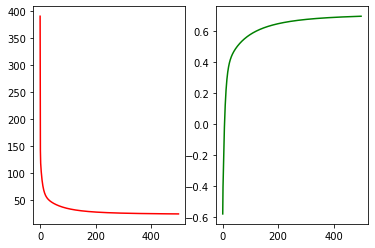

In [191]:
# Задание 5: Обучите модель. Подберите оптимальное количество епох и learning rate
# У вас получатся два графика - один будет показывать как падает ошибка с каждой эпохой (красный)
# Второй - как растет ваш r2 score ("точность") вашей модели на тестовом сете
# Если все сделано правильно - первый график будет падать, а второй расти


EPOCHS = 500

learning_rate = 0.1


W = torch.nn.Parameter(torch.ones(N_FEATURES+1))

losses = []
scores = []

for i in range(EPOCHS):
    W, loss, y_hat = train_epoch(features_train, W, targets_train, learning_rate)
    losses.append(loss.item())
    
    y_hat = linear_regression(features_test, W).detach()
    scores.append(score(targets_test, y_hat))

fig, axs = plt.subplots(1, 2) 
axs[0].plot(np.arange(EPOCHS), losses, c='red')
axs[1].plot(np.arange(EPOCHS), scores, c='green')

In [192]:
print ("Final R2 score:", scores[-1])

Final R2 score: 0.6970371858125558


### CHECK

#### Ваши результаты по R2 score должны получиться близкими (+-2) от результатов модели регрессии sklearn, если вы все сделали правильно

In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
model = LinearRegression()
model = model.fit(features_train, targets_train)
model.score(features_test, targets_test)

0.7185021407505741

In [195]:
if (model.score(features_test, targets_test) - scores[-1]) < 0.03:
    print ("Поздравляю, все получилось!")
else:
    print ("Стоит еще попробовать!")

Поздравляю, все получилось!
